# Import Libraries

In [175]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Load The Dataset

In [124]:
data = pd.read_csv("car data.csv")

In [125]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Examine The Dataset

In [126]:
data.shape

(301, 9)

In [127]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [129]:
data.describe().style.background_gradient(cmap = 'YlGnBu')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [130]:
data.corr().style.background_gradient(cmap = 'YlGn')

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_13008\1617311261.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_13008\761060753.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

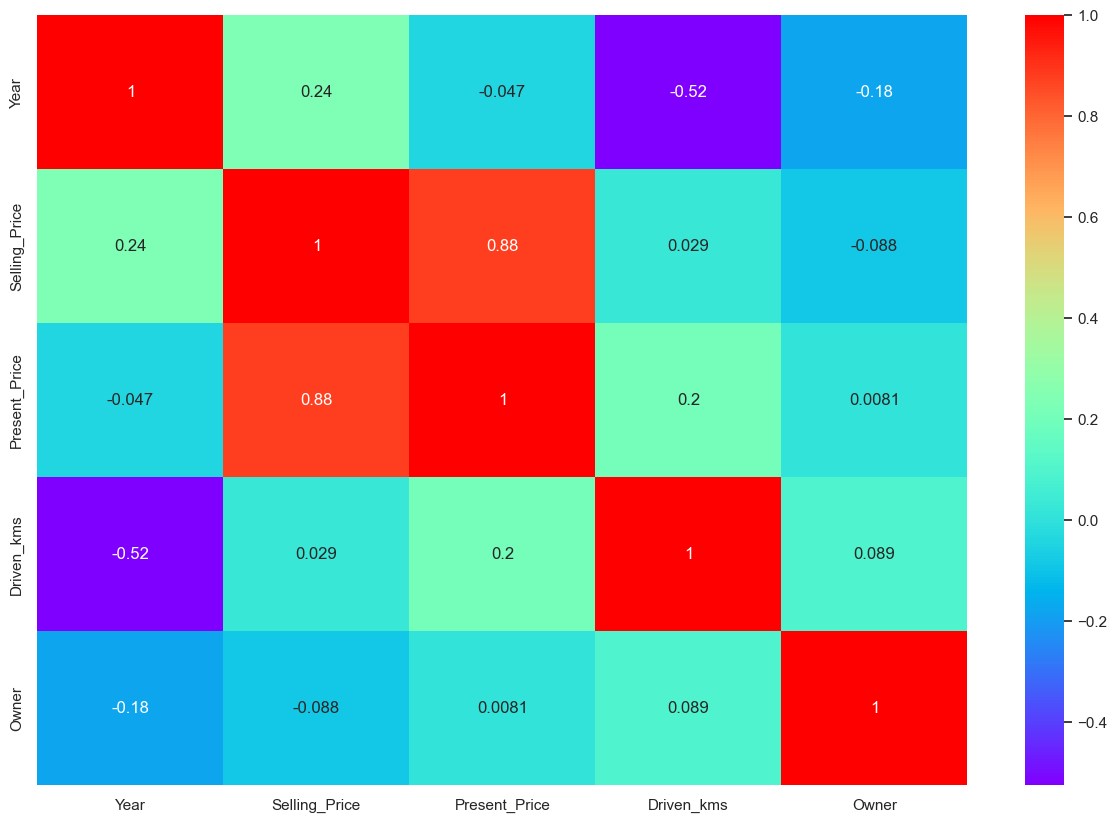

In [131]:
#Let's visualize the correlation matrix iin the seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot = True, cmap = 'rainbow')

# Data Cleaning

In [132]:
data.isna().sum().reset_index().rename(columns = {0:'count'})

,index,count
0,Car_Name,0
1,Year,0
2,Selling_Price,0
3,Present_Price,0
4,Driven_kms,0
5,Fuel_Type,0
6,Selling_type,0
7,Transmission,0
8,Owner,0


In [133]:
# No missing values found, so no further cleaning required.

# Explore Data analysis (EDA)

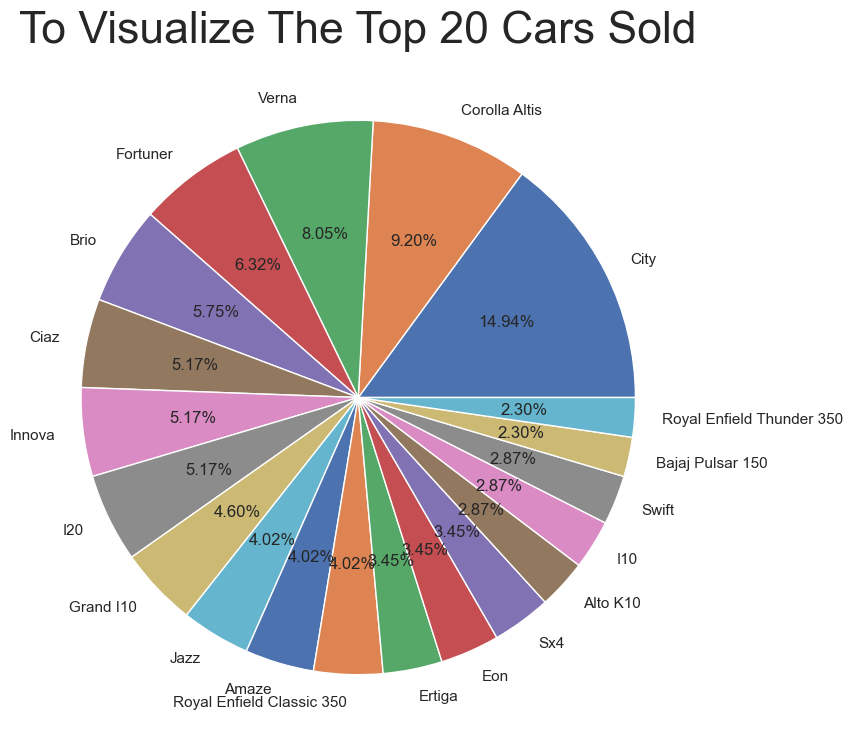

In [134]:
car_names = data['Car_Name'].value_counts()

label = ['City', 'Corolla Altis', 'Verna', 'Fortuner', 'Brio', 'Ciaz', 'Innova', 'I20', 'Grand I10', 'Jazz', 'Amaze', 'Royal Enfield Classic 350', 'Ertiga', 'Eon', 'Sx4', 'Alto K10', 'I10', 'Swift', 'Bajaj Pulsar 150', 'Royal Enfield Thunder 350']
plt.figure(figsize = (16,9))
plt.pie(car_names[:20], labels = label, autopct = '%1.2f%%')
plt.title("To Visualize The Top 20 Cars Sold", fontsize = 32, fontweight = 'light')
plt.show()

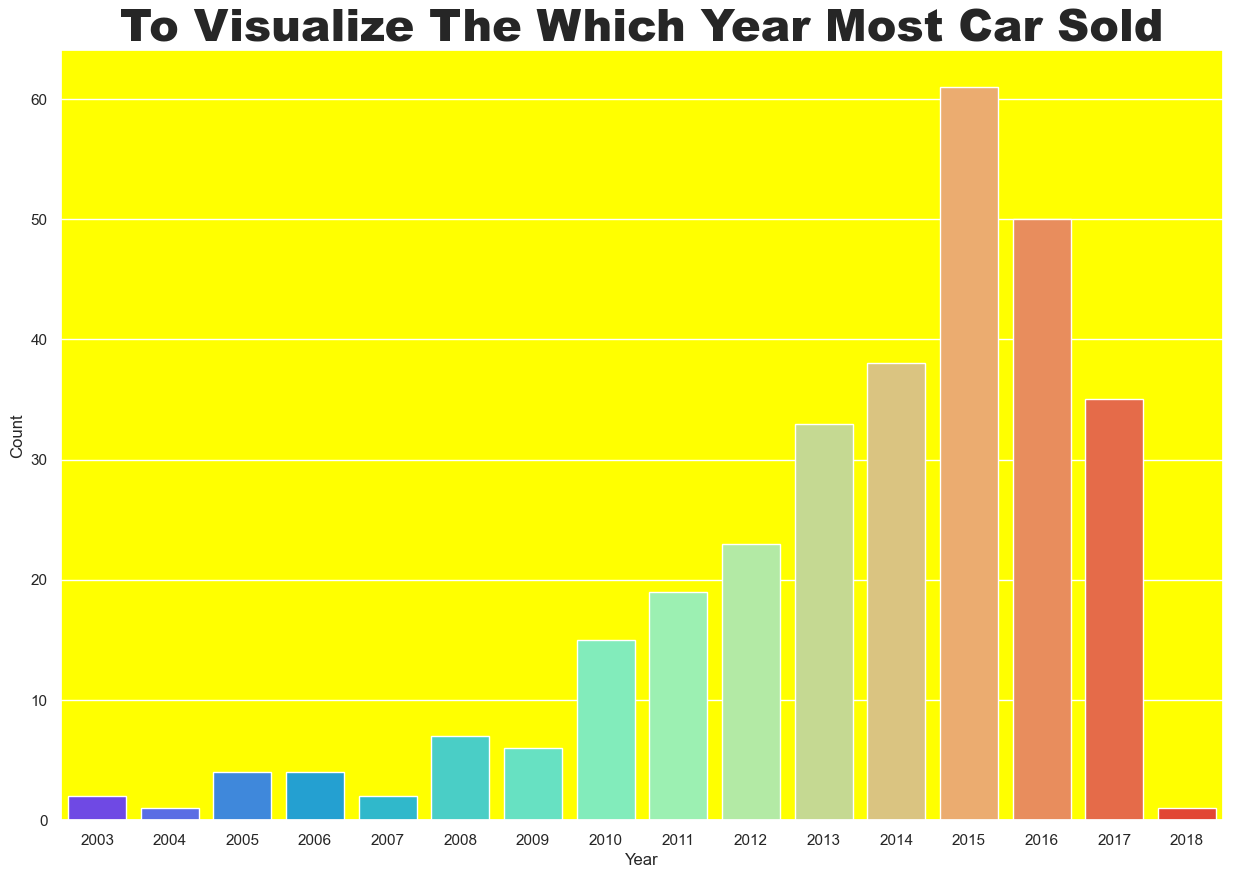

In [135]:
year = data['Year'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'yellow')
sns.set(rc = {'figure.figsize':(16,8)}, style = 'darkgrid')
ax.set_title("To Visualize The Which Year Most Car Sold", fontsize = 32, fontweight = 900)
sns.barplot(x = year.index, y = year, palette = 'rainbow')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

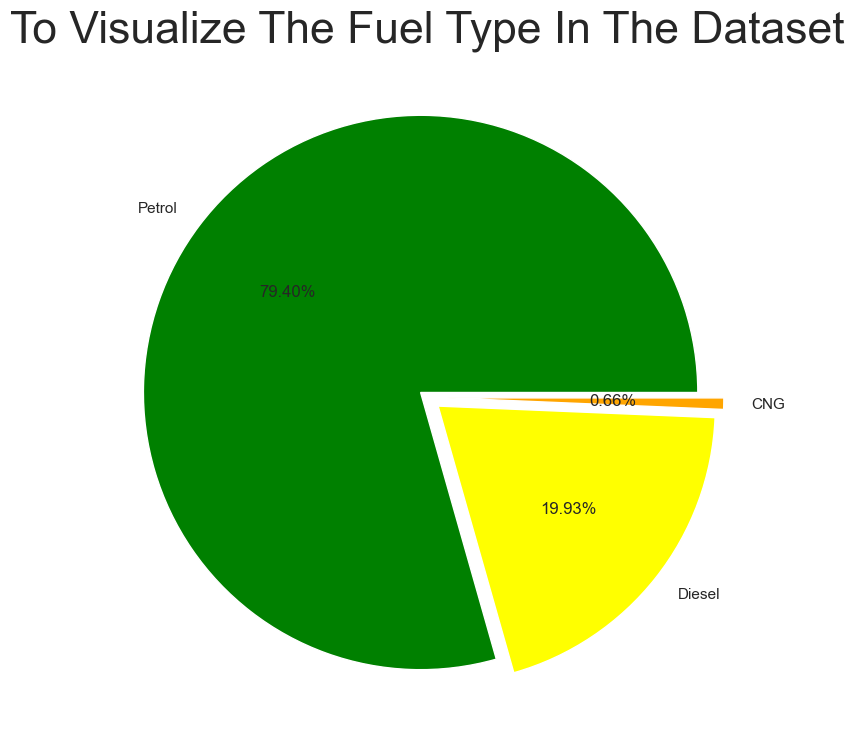

In [136]:
fuel_type = data['Fuel_Type'].value_counts()
label = ['Petrol', 'Diesel', 'CNG']
plt.figure(figsize = (16,9))
plt.pie(fuel_type, labels = label, autopct = '%1.2f%%', explode = [0.03, 0.05, 0.07], colors = ['green','yellow','orange'])
plt.title("To Visualize The Fuel Type In The Dataset", fontsize = 32, fontweight = 'light')
plt.show()

In [137]:
import plotly.express as px
figure = px.scatter(data, y = 'Selling_Price', x = 'Present_Price')
figure.update_layout(bargap = 0.2, bargroupgap = 0.1, plot_bgcolor = 'yellow')
figure.show()

# Label Encoder

In [138]:
label = LabelEncoder()

In [139]:
data['Car_Name'] = label.fit_transform(data['Car_Name'])

In [140]:
data['Fuel_Type'] = label.fit_transform(data['Fuel_Type'])

In [141]:
data['Selling_type'] = label.fit_transform(data['Selling_type'])

In [142]:
data['Transmission'] = label.fit_transform(data['Transmission'])

# Prepare The Data For Training

In [143]:
X = data.drop(['Selling_Price'], axis = 1)
Y = data['Selling_Price']

# Normalize The Data

In [144]:
Scaler = StandardScaler()

In [145]:
X = Scaler.fit_transform(X)

# Split The Data Into Training and Testing Sets

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

# Linear Regression

## Linear Regression Model

In [147]:
LinearRegression = LinearRegression()

## Fit The Training Data

In [148]:
LinearRegression.fit(X_train, Y_train)

LinearRegression()

## Prediction Of The Test Data

In [150]:
LinearRegressionPrediction = LinearRegression.predict(X_test)

## Accuracy of the Linear Regression Algorithm

In [151]:
print(f'Accuracy For The Test Data: {LinearRegression.score(X_test, Y_test)*100:.2f}')

Accuracy For The Test Data: 87.50


In [152]:
print(f'Accuracy For The Training Data: {LinearRegression.score(X_train, Y_train)*100:.2f}')

Accuracy For The Training Data: 87.75


## Mean Squared Error of the Linear Regression Algorithm

In [153]:
MeanSquaredError = mean_squared_error(Y_test, LinearRegressionPrediction)

## Root Mean Squred Error of the Linear Regression Algorithm

In [154]:
RootMeanSquredError = np.sqrt(MeanSquaredError)

In [155]:
print("Root Mean Squred Error For Linear Regression Algorithm {:.4f}".format(RootMeanSquredError))

Root Mean Squred Error For Linear Regression Algorithm 1.8531


## R2 Score of the Linear Regression Algorithm

In [156]:
R2_Score = r2_score(Y_test, LinearRegressionPrediction)

In [157]:
print("R2 Score For Linear Regression Algorithm  {:4f}".format(R2_Score))

R2 Score For Linear Regression Algorithm  0.875005


## Mean Absolute Error of the Linear Regression Algorithm

In [158]:
MeanAbsoluteError = mean_absolute_error(Y_test, LinearRegressionPrediction)

In [159]:
print("Mean Absolute Error For Linear Regression Algorithm {:4f}".format(MeanAbsoluteError))

Mean Absolute Error For Linear Regression Algorithm 1.233813


## Visualize of 'Actual Prices vs Predicted Prices' of the Linear Regression Algorithm

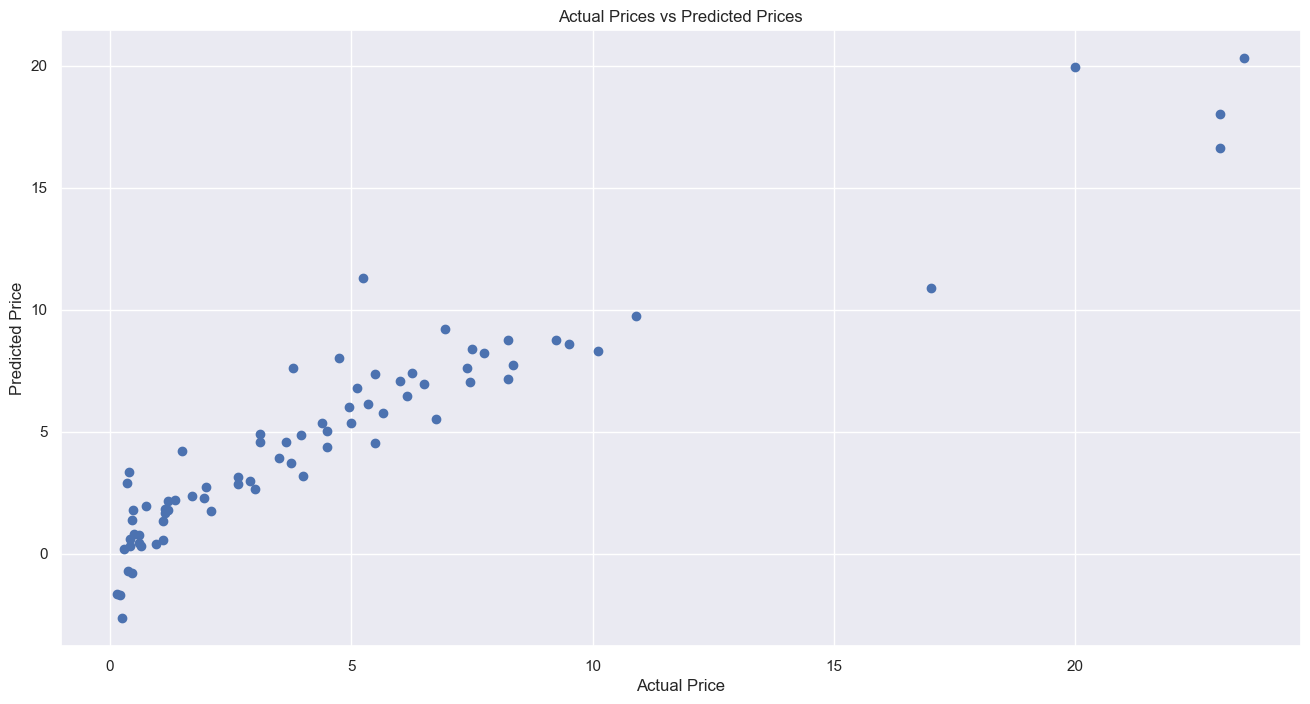

In [195]:
plt.scatter(Y_test, LinearRegressionPrediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Decision Tree Regressor 

## Decision Tree Regressor Model

In [160]:
DecisionTreeRegressorModel = DecisionTreeRegressor(random_state=0)

## Fit The Training Data

In [161]:
DecisionTreeRegressorModel.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

## Prediction Of The Test Data

In [162]:
DecisionTreeRegressorModelPrediction = DecisionTreeRegressorModel.predict(X_test)

## Accuracy of the Decision Tree Regressor Algorithm

In [163]:
print(f'Accuracy For The Test Data: {DecisionTreeRegressorModel.score(X_test, Y_test)*100:.2f}')

Accuracy For The Test Data: 96.04


In [164]:
print(f'Accuracy For The Training Data: {DecisionTreeRegressorModel.score(X_train, Y_train)*100:.2f}')

Accuracy For The Training Data: 100.00


## Mean Squared Error of the Decision Tree Regressor Algorithm

In [165]:
MeanSquaredError = mean_squared_error(Y_test, DecisionTreeRegressorModelPrediction)

## Root Mean Squred Error of the Decision Tree Regressor Algorithm

In [166]:
RootMeanSquredError = np.sqrt(MeanSquaredError)

In [167]:
print("Root Mean Squred Error For Decision Tree Regressor Algorithm {:.4f}".format(RootMeanSquredError))

Root Mean Squred Error For Decision Tree Regressor Algorithm 1.0429


## R2 Score of the Decision Tree Regressor  Algorithm

In [170]:
R2_Score = r2_score(Y_test, DecisionTreeRegressorModelPrediction)

In [172]:
print("R2 Score For Decision Tree Regressor Algorithm  {:4f}".format(R2_Score))

R2 Score For Decision Tree Regressor Algorithm  0.960416


## Mean Absolute Error of the Decision Tree Regressor Algorithm

In [173]:
MeanAbsoluteError = mean_absolute_error(Y_test, DecisionTreeRegressorModelPrediction)

In [174]:
print("Mean Absolute Error For Decision Tree Regressor Algorithm {:4f}".format(MeanAbsoluteError))

Mean Absolute Error For Decision Tree Regressor Algorithm 0.641053


## Visualize of 'Actual Prices vs Predicted Prices' of the Decision Tree Regressor Algorithm

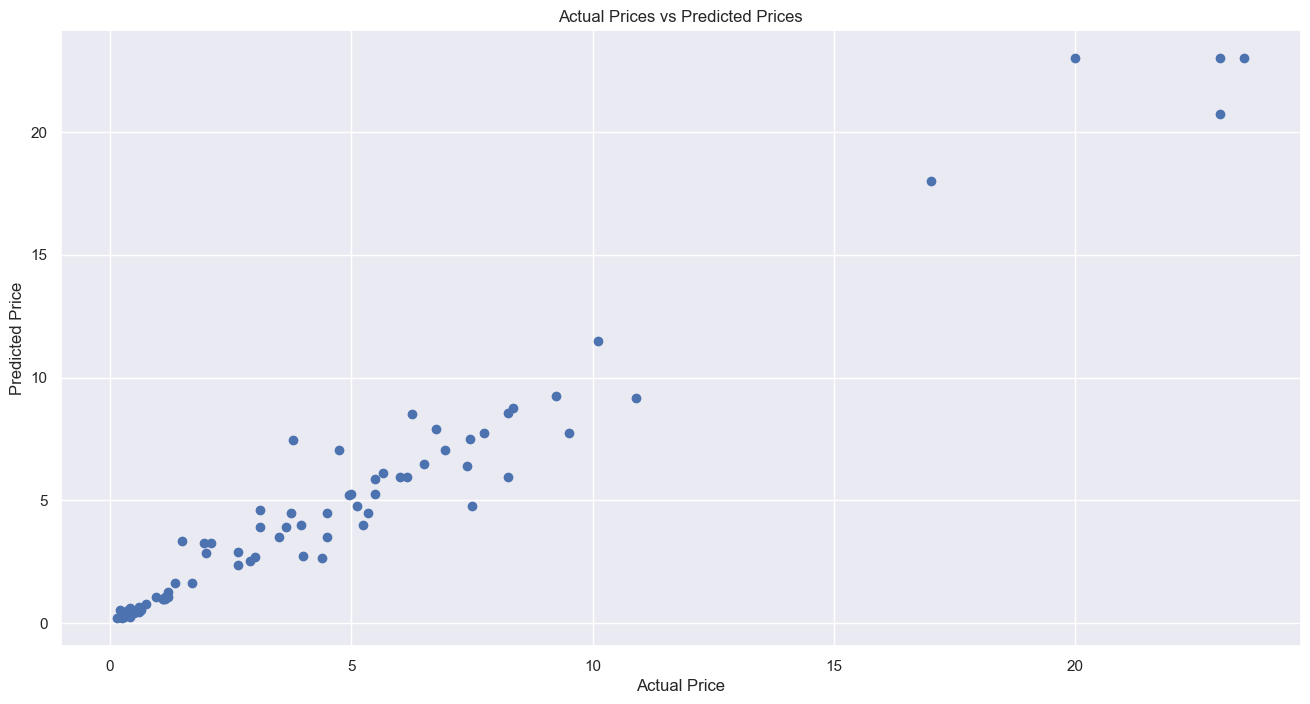

In [196]:
plt.scatter(Y_test, DecisionTreeRegressorModelPrediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Random Forest Regressor

## Random Forest Regressor Model

In [176]:
RandomForestRegressorModel = RandomForestRegressor()

## Fit The Training Data

In [178]:
RandomForestRegressorModel.fit(X_train, Y_train)

RandomForestRegressor()

## Prediction Of The Test Data

In [179]:
RandomForestRegressorModelPrediction = RandomForestRegressorModel.predict(X_test)

## Accuracy of the Random Forest Regressor Algorithm

In [180]:
print(f'Accuracy For The Test Data: {RandomForestRegressorModel.score(X_test, Y_test)*100:.2f}')

Accuracy For The Test Data: 97.16


In [181]:
print(f'Accuracy For The Training Data: {RandomForestRegressorModel.score(X_train, Y_train)*100:.2f}')

Accuracy For The Training Data: 98.32


## Mean Squared Error of the Random Forest Regressor Algorithm

In [182]:
MeanSquaredError = mean_squared_error(Y_test, RandomForestRegressorModelPrediction)

## Root Mean Squred Error of the Random Forest Regressor Algorithm

In [184]:
RootMeanSquredError = np.sqrt(MeanSquaredError)

In [185]:
print("Root Mean Squred Error For Random Forest Regressor Algorithm {:.4f}".format(RootMeanSquredError))

Root Mean Squred Error For Random Forest Regressor Algorithm 0.8828


## R2 Score of the Random Forest Regressor Algorithm

In [186]:
R2_Score = r2_score(Y_test, RandomForestRegressorModelPrediction)

In [187]:
print("R2 Score For Random Forest Regressor Algorithm  {:4f}".format(R2_Score))

R2 Score For Random Forest Regressor Algorithm  0.971635


## Mean Absolute Error of the Random Forest Regressor Algorithm

In [191]:
MeanAbsoluteError = mean_absolute_error(Y_test, RandomForestRegressorModelPrediction)

In [192]:
print("Mean Absolute Error For Random Forest Regressor Algorithm {:4f}".format(MeanAbsoluteError))

Mean Absolute Error For Random Forest Regressor Algorithm 0.575943


## Visualize of 'Actual Prices vs Predicted Prices' of the Random Forest Regressor Algorithm¶

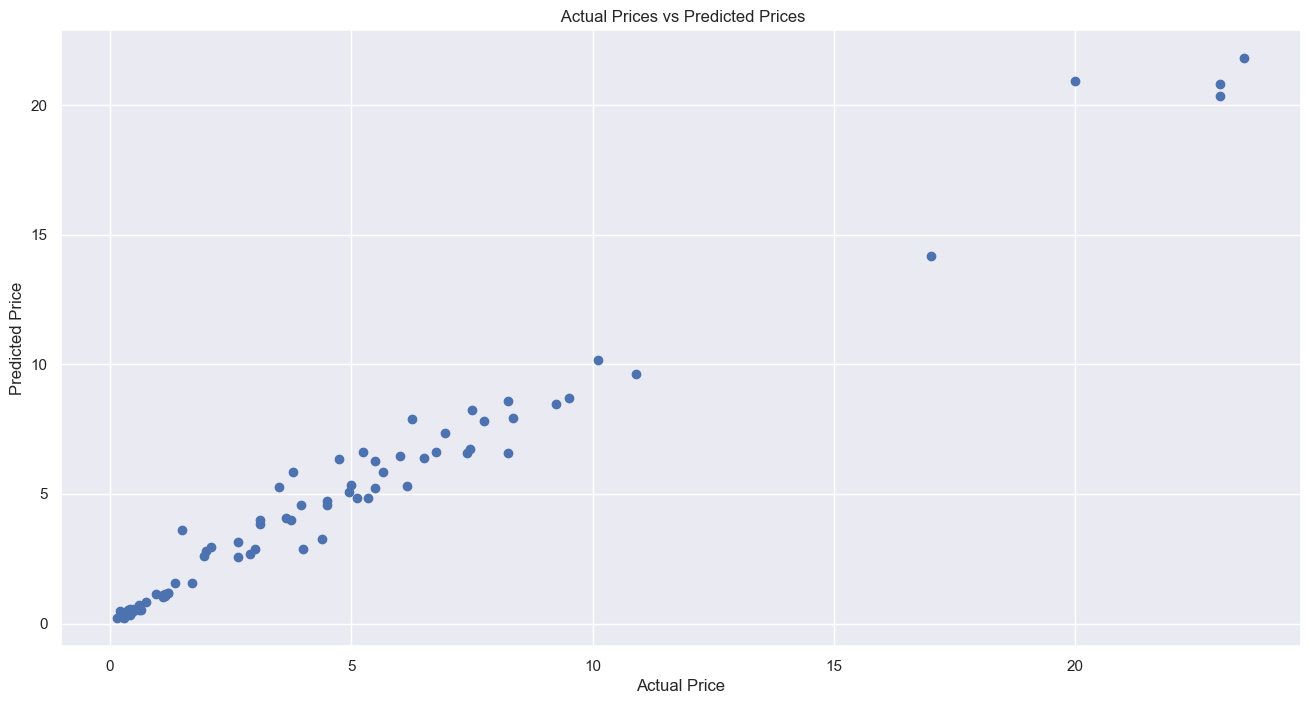

In [197]:
plt.scatter(Y_test, RandomForestRegressorModelPrediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()